In [1]:
#!/usr/bin/python3
import pandas
import numpy
import matplotlib.pyplot as plot
import seaborn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import learning_curve


In [2]:
#loading the dataset in our dataframe
dataframe = pandas.read_csv("Dataset/kddcup99.csv")

In [3]:
#setting the pandas option to display all the columns
pandas.set_option('display.max_columns', None)

In [4]:
dataframe.head() #printing the first 5 rows of our dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [5]:
dataframe.tail() #printing the last 5 rows of our dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
494015,0,tcp,http,SF,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal
494019,0,tcp,http,SF,219,1234,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,35,0.00,0.00,0.0,0.0,1.0,0.0,0.14,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal


In [6]:
#printing the shape and size of our dataset
print(f" shape :  {dataframe.shape}")
print(f" size : {dataframe.size}")

 shape :  (494020, 42)
 size : 20748840


In [7]:
dataframe.columns #printing all the columns names 

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [8]:
dataframe.info() #listing the informastion about all the comumns in our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [9]:
dataframe.sample(10)#showing the random 10 samples fron our dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
481047,0,udp,private,SF,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,231,0.91,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal
385026,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,226,8,1.0,1.0,0.0,0.0,0.04,0.06,0.00,255,8,0.03,0.07,0.00,0.00,1.0,1.0,0.0,0.0,neptune
445555,0,icmp,ecr_i,SF,520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
491790,5,tcp,smtp,SF,802,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.0,0.0,0.0,0.0,1.00,0.00,1.00,69,163,0.59,0.09,0.01,0.01,0.0,0.0,0.0,0.0,normal
313968,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
150213,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
294749,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
135085,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
169066,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
81033,0,tcp,http,SF,330,1149,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,34,36,0.0,0.0,0.0,0.0,1.00,0.00,0.06,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,normal


In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [11]:
dataframe.values

array([[0, 'tcp', 'http', ..., 0.0, 0.0, 'normal'],
       [0, 'tcp', 'http', ..., 0.0, 0.0, 'normal'],
       [0, 'tcp', 'http', ..., 0.0, 0.0, 'normal'],
       ...,
       [0, 'tcp', 'http', ..., 0.0, 0.0, 'normal'],
       [0, 'tcp', 'http', ..., 0.0, 0.0, 'normal'],
       [0, 'tcp', 'http', ..., 0.0, 0.0, 'normal']], dtype=object)

In [12]:
dataframe.describe()#exploreing the dataset by generating summary statistics
#using the .describe() method

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.0,494020.0,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685308e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,0.000111,0.000036,0.011352,0.001083,0.000109,0.001008,0.0,0.0,0.001387,332.286361,292.907131,0.176687,0.176609,0.057434,0.057719,0.791547,0.020982,0.028996,232.471248,188.666052,0.753781,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,0.010551,0.007793,2.012720,0.096416,0.011020,0.036482,0.0,0.0,0.037211,213.147107,246.322736,0.380717,0.381017,0.231624,0.232147,0.388190,0.082206,0.142397,64.744601,106.040205,0.410780,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,117.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,28.000000,2.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#checking for missing values and count them for each columns
dataframe.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [14]:
#we dont need to check for infinity values i.e -inf/inf and count for each column because we know that the dataset contains none infinity values im its columns
#counting the occurrences of unique values in the "label" column of our training dataframe
dataframe["label"].value_counts()

smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64

In [15]:
#removing rows with any NaN values
dataframe = dataframe.dropna()
dataframe

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


<Axes: >

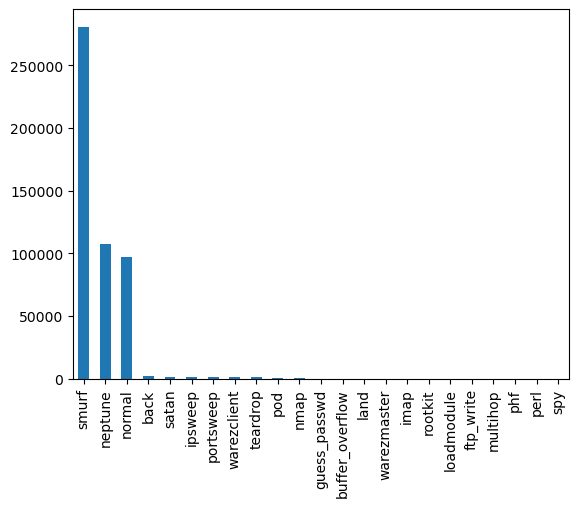

In [16]:
#ploting the labe values into a bar of the testing dataset
dataframe["label"].value_counts().plot.bar()

In [17]:
#counting the occurrences of unique values in the "protocol_type" column of our dataset
dataframe["protocol_type"].value_counts()

icmp    283602
tcp     190064
udp      20354
Name: protocol_type, dtype: int64

<Axes: >

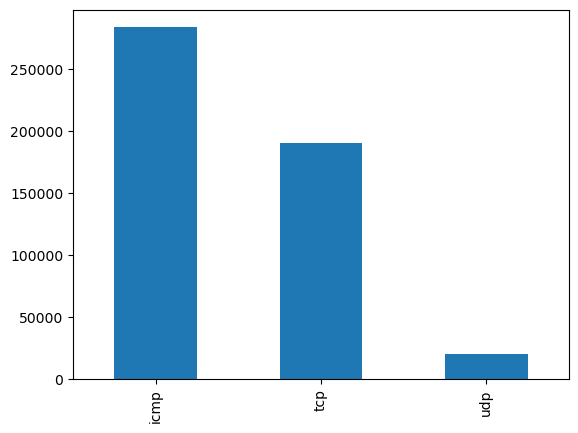

In [18]:
#ploting the values of "protocol_type" in bar of our dataset
dataframe["protocol_type"].value_counts().plot.bar()

In [19]:
#now replacing the values of "protocol_type" from string to int of both testing and training dataset
dataframe['protocol_type'].replace({"tcp": 1, "udp": 2, "icmp": 3}, inplace=True)

In [20]:
#verifying if the values have changed or not
dataframe["protocol_type"].value_counts()

3    283602
1    190064
2     20354
Name: protocol_type, dtype: int64

In [21]:
#checking if the result is changed in the dataset or not 
dataframe.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,1,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,1,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,1,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,1,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [22]:
#count the occurrences of unique values in the "service" column of our dataset
dataframe["service"].value_counts()

ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
tftp_u          1
pm_dump         1
red_i           1
Name: service, Length: 66, dtype: int64

In [23]:
dataframe["service"].unique()#Get the unique values in the "service" column of the training dataset

array(['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp',
       'eco_i', 'ntp_u', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data',
       'rje', 'time', 'mtp', 'link', 'remote_job', 'gopher', 'ssh',
       'name', 'whois', 'domain', 'login', 'imap4', 'daytime', 'ctf',
       'nntp', 'shell', 'IRC', 'nnsp', 'http_443', 'exec', 'printer',
       'efs', 'courier', 'uucp', 'klogin', 'kshell', 'echo', 'discard',
       'systat', 'supdup', 'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2',
       'sunrpc', 'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm',
       'sql_net', 'vmnet', 'bgp', 'Z39_50', 'ldap', 'netstat', 'urh_i',
       'X11', 'urp_i', 'pm_dump', 'tftp_u', 'tim_i', 'red_i'],
      dtype=object)

In [24]:
#converting the list we got from "dataframe["service"].unique()" to a dictionary
ServiceList = ['http', 'smtp', 'finger', 'domain_u', 'telnet', 'ftp', 'eco_i',
       'ntp_u', 'auth', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data',
       'rje', 'mtp', 'link', 'remote_job', 'time', 'gopher', 'ssh',
       'name', 'domain', 'login', 'imap4', 'daytime', 'ctf', 'nntp',
       'shell', 'IRC', 'http_443', 'exec', 'efs', 'courier', 'uucp',
       'klogin', 'kshell', 'whois', 'echo', 'discard', 'systat',
       'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2', 'sunrpc',
       'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm', 'sql_net',
       'Z39_50', 'supdup', 'ldap', 'nnsp', 'printer', 'netstat', 'vmnet',
       'bgp', 'urh_i', 'X11', 'urp_i', 'pm_dump', 'tftp_u', 'tim_i',
       'red_i']
length  = len(ServiceList)
print("length : " , length)
#creating a dictionary with values assigned from 0 to all the way to the end of the list
ServiceDict = {service: index for index, service in enumerate(ServiceList)}
ServiceDict

length :  66


{'http': 0,
 'smtp': 1,
 'finger': 2,
 'domain_u': 3,
 'telnet': 4,
 'ftp': 5,
 'eco_i': 6,
 'ntp_u': 7,
 'auth': 8,
 'ecr_i': 9,
 'other': 10,
 'private': 11,
 'pop_3': 12,
 'ftp_data': 13,
 'rje': 14,
 'mtp': 15,
 'link': 16,
 'remote_job': 17,
 'time': 18,
 'gopher': 19,
 'ssh': 20,
 'name': 21,
 'domain': 22,
 'login': 23,
 'imap4': 24,
 'daytime': 25,
 'ctf': 26,
 'nntp': 27,
 'shell': 28,
 'IRC': 29,
 'http_443': 30,
 'exec': 31,
 'efs': 32,
 'courier': 33,
 'uucp': 34,
 'klogin': 35,
 'kshell': 36,
 'whois': 37,
 'echo': 38,
 'discard': 39,
 'systat': 40,
 'iso_tsap': 41,
 'hostnames': 42,
 'csnet_ns': 43,
 'pop_2': 44,
 'sunrpc': 45,
 'uucp_path': 46,
 'netbios_ns': 47,
 'netbios_ssn': 48,
 'netbios_dgm': 49,
 'sql_net': 50,
 'Z39_50': 51,
 'supdup': 52,
 'ldap': 53,
 'nnsp': 54,
 'printer': 55,
 'netstat': 56,
 'vmnet': 57,
 'bgp': 58,
 'urh_i': 59,
 'X11': 60,
 'urp_i': 61,
 'pm_dump': 62,
 'tftp_u': 63,
 'tim_i': 64,
 'red_i': 65}

In [25]:
#now replacing the values of "protocol_type" from string to int of our dataset
dataframe['service'].replace(ServiceDict, inplace=True)

In [26]:
dataframe["service"].unique()

array([ 0,  1,  2,  3,  8,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 18, 15,
       16, 17, 19, 20, 21, 37, 22, 23, 24, 25, 26, 27, 28, 29, 54, 30, 31,
       55, 32, 33, 34, 35, 36, 38, 39, 40, 52, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 57, 58, 51, 53, 56, 59, 60, 61, 62, 63, 64, 65])

In [27]:
dataframe["service"].value_counts() #the result must be in int

9     281400
11    110893
0      64292
1       9723
10      7237
       ...  
60        11
64         7
63         1
62         1
65         1
Name: service, Length: 66, dtype: int64

In [28]:
 dataframe.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,0,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,1,0,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,1,0,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,1,0,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,1,0,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [29]:
dataframe["flag"].unique()

array(['SF', 'S1', 'REJ', 'S2', 'S0', 'S3', 'RSTO', 'RSTR', 'RSTOS0',
       'OTH', 'SH'], dtype=object)

In [30]:
dataframe["flag"].value_counts()

SF        378439
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

<Axes: >

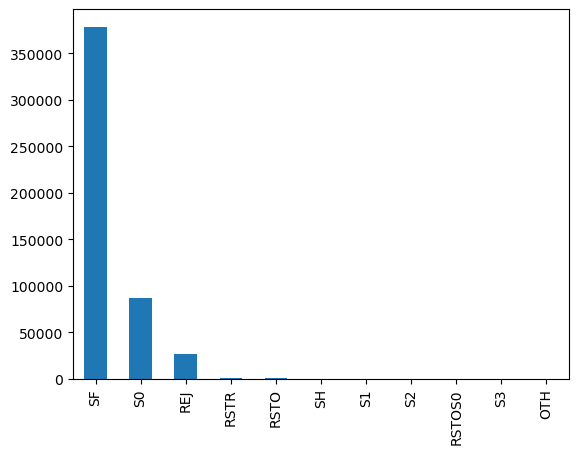

In [31]:
dataframe["flag"].value_counts().plot.bar()

In [32]:
#converting the list we got from "dataframe["flag"].unique()" to a dictionary
FlagList = ['SF', 'S1', 'REJ', 'S2', 'S0', 'S3', 'RSTO', 'RSTR', 'RSTOS0',
       'OTH', 'SH']
length  = len(FlagList)
print("length : " , length)
#creating a dictionary with values assigned from 0 to all the way to the end of the list
FlagDict = {flag: index for index, flag in enumerate(FlagList)}
FlagDict

length :  11


{'SF': 0,
 'S1': 1,
 'REJ': 2,
 'S2': 3,
 'S0': 4,
 'S3': 5,
 'RSTO': 6,
 'RSTR': 7,
 'RSTOS0': 8,
 'OTH': 9,
 'SH': 10}

In [33]:
#now replacing the values of "protocol_type" from string to int of our dataset
dataframe['flag'].replace(FlagDict, inplace=True)

In [34]:
dataframe.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,0,0,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,1,0,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,1,0,0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,1,0,0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,1,0,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [35]:
LabelList = dataframe["label"].unique()
LabelList

array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
       'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep',
       'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap',
       'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'],
      dtype=object)

In [36]:
#converting the list we got from "dataframe["label"].unique()" to a dictionary
length  = len(LabelList)
print("length : " , length)
#creating a dictionary with values assigned from 0 to all the way to the end of the list
LabelDict = {label: index for index, label in enumerate(LabelList)}
LabelDict

length :  23


{'normal': 0,
 'buffer_overflow': 1,
 'loadmodule': 2,
 'perl': 3,
 'neptune': 4,
 'smurf': 5,
 'guess_passwd': 6,
 'pod': 7,
 'teardrop': 8,
 'portsweep': 9,
 'ipsweep': 10,
 'land': 11,
 'ftp_write': 12,
 'back': 13,
 'imap': 14,
 'satan': 15,
 'phf': 16,
 'nmap': 17,
 'multihop': 18,
 'warezmaster': 19,
 'warezclient': 20,
 'spy': 21,
 'rootkit': 22}

In [37]:
#now replacing the values of "label" from string to int of our dataset
dataframe['label'].replace(LabelDict, inplace=True)

In [38]:
dataframe.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,0,0,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,1,0,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,1,0,0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,1,0,0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,1,0,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


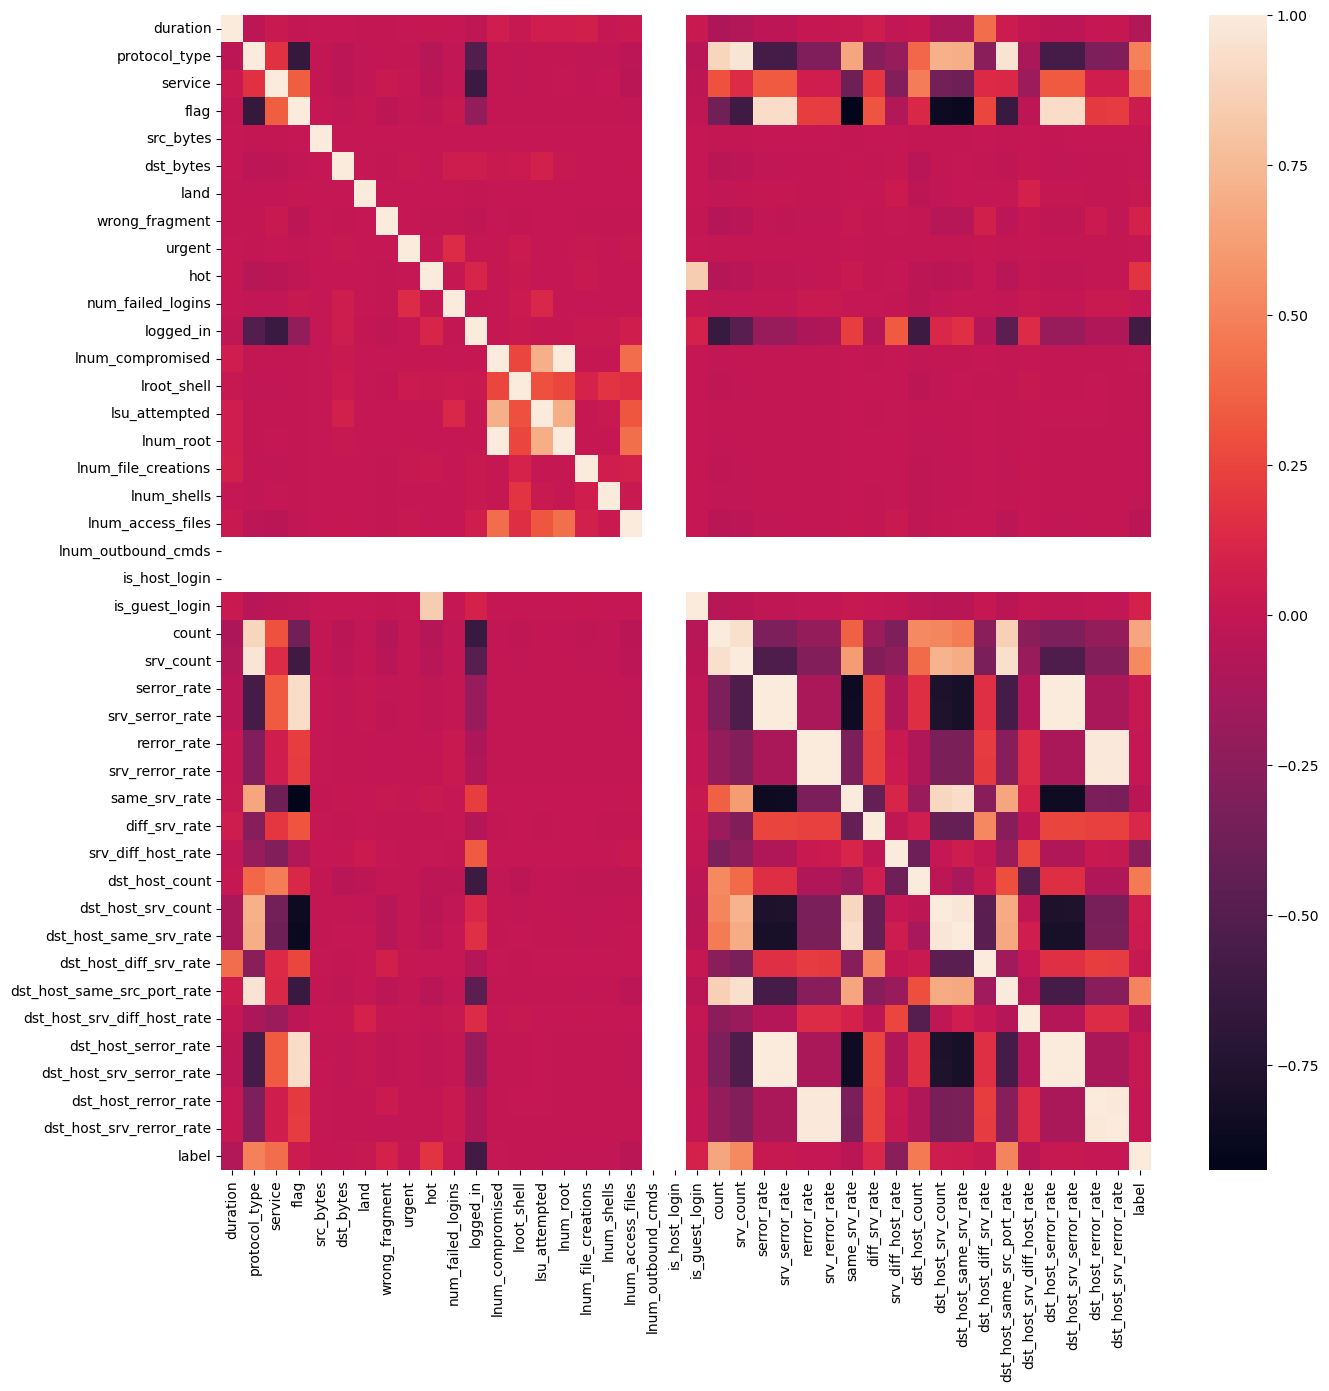

In [39]:
#corolation heatmap visualization of the dataset
correlation = dataframe.corr()
plot.figure(figsize=(15,15))
seaborn.heatmap(correlation)
plot.show()

In [40]:
#showing corolation in table format
dataframe.corr()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
duration,1.000000,-0.023715,0.026920,-0.006068,0.004258,0.005440,-0.000452,-0.003235,0.003786,0.013213,0.005239,-0.017265,0.058095,0.021340,0.055853,0.056766,0.074562,-0.000169,0.025661,NaN,NaN,0.023424,-0.105154,-0.080250,-0.031416,-0.031378,0.012053,0.012106,0.021771,0.051800,-0.011790,0.010073,-0.117516,-0.118458,0.406233,0.042642,-0.006983,-0.030400,-0.030612,0.006739,0.010465,-0.077989
protocol_type,-0.023715,1.000000,0.166786,-0.655335,-0.002664,-0.032433,-0.008262,-0.005357,-0.003183,-0.054640,-0.012110,-0.516476,-0.007030,-0.013063,-0.005788,-0.006982,-0.013905,-0.012280,-0.034208,NaN,NaN,-0.046131,0.887492,0.966840,-0.574149,-0.573835,-0.306954,-0.307803,0.657082,-0.277028,-0.197989,0.385532,0.711420,0.692294,-0.260155,0.956481,-0.117591,-0.574553,-0.573441,-0.309226,-0.308834,0.493818
service,0.026920,0.166786,1.000000,0.350149,-0.001545,-0.026684,-0.008442,0.023463,0.001939,-0.041225,-0.008597,-0.627468,-0.006866,-0.010419,-0.004435,-0.000285,-0.008767,0.005423,-0.040272,NaN,NaN,-0.025375,0.300621,0.138363,0.334824,0.334260,0.062037,0.059576,-0.391345,0.188670,-0.290580,0.473454,-0.355638,-0.389535,0.128046,0.126905,-0.179193,0.334693,0.335189,0.059848,0.062010,0.406659
flag,-0.006068,-0.655335,0.350149,1.000000,0.003872,-0.013470,0.013371,-0.025261,-0.001361,-0.021159,0.020260,-0.216361,-0.002809,-0.005586,-0.002475,-0.002985,-0.005095,-0.005251,-0.014451,NaN,NaN,-0.019484,-0.372189,-0.606885,0.928661,0.929011,0.219479,0.216122,-0.925664,0.314960,-0.082986,0.124740,-0.859188,-0.879537,0.256300,-0.635475,-0.029200,0.928322,0.928892,0.210140,0.211055,0.038440
src_bytes,0.004258,-0.002664,-0.001545,0.003872,1.000000,-0.000002,-0.000020,-0.000139,-0.000005,0.004483,-0.000027,0.001701,0.000119,-0.000022,-0.000010,-0.000010,0.000013,0.000005,-0.000052,NaN,NaN,-0.000082,-0.003098,-0.002501,0.001558,0.001114,0.000591,0.001379,-0.001860,0.006207,-0.000015,-0.001743,-0.003212,-0.002052,0.000578,-0.000724,0.001186,-0.000718,0.001122,-0.000393,0.001328,0.008340
dst_bytes,0.005440,-0.032433,-0.026684,-0.013470,-0.000002,1.000000,-0.000175,-0.001254,0.016288,0.004365,0.049330,0.047814,0.023298,0.031680,0.075656,0.020746,0.004958,0.000144,0.008746,NaN,NaN,0.001289,-0.040373,-0.030544,-0.011908,-0.011930,-0.006166,-0.005808,0.014002,-0.005702,0.008135,-0.048869,-0.005849,0.007058,-0.005314,-0.020143,0.008707,-0.011334,-0.011235,-0.005000,-0.005471,0.002452
land,-0.000452,-0.008262,-0.008442,0.013371,-0.000020,-0.000175,1.000000,-0.000318,-0.000017,-0.000295,-0.000065,-0.002784,-0.000038,-0.000070,-0.000031,-0.000038,-0.000075,-0.000066,-0.000184,NaN,NaN,-0.000249,-0.010260,-0.007886,0.013898,0.014422,-0.000777,-0.001659,0.002286,0.002282,0.036985,-0.023671,-0.011587,0.001984,-0.000333,0.003799,0.083320,0.012658,0.007795,-0.001511,-0.001665,0.019074
wrong_fragment,-0.003235,-0.005357,0.023463,-0.025261,-0.000139,-0.001254,-0.000318,1.000000,-0.000123,-0.002106,-0.000467,-0.019908,-0.000271,-0.000504,-0.000223,-0.000269,-0.000536,-0.000473,-0.001319,NaN,NaN,-0.001778,-0.061935,-0.047789,-0.013969,-0.022119,-0.011529,-0.011865,0.017416,-0.007077,0.000153,-0.005191,-0.058624,-0.054903,0.071857,-0.031803,0.012092,-0.019091,-0.022104,0.029774,-0.011904,0.082780
urgent,0.003786,-0.003183,0.001939,-0.001361,-0.000005,0.016288,-0.000017,-0.000123,1.000000,0.000356,0.141996,0.006164,0.014285,0.034790,-0.000012,0.009476,0.015211,-0.0

In [41]:
#definiing dependent variable
y = dataframe["label"].values
print(y)
y = y.astype('int')

[0 0 0 ... 0 0 0]


In [42]:
# Defining independent variable
X = dataframe.drop(labels=["label"], axis=1)
print(X)
X = X.astype('int')

        duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0              0              1        0     0        181       5450     0   
1              0              1        0     0        239        486     0   
2              0              1        0     0        235       1337     0   
3              0              1        0     0        219       1337     0   
4              0              1        0     0        217       2032     0   
...          ...            ...      ...   ...        ...        ...   ...   
494015         0              1        0     0        310       1881     0   
494016         0              1        0     0        282       2286     0   
494017         0              1        0     0        203       1200     0   
494018         0              1        0     0        291       1200     0   
494019         0              1        0     0        219       1234     0   

        wrong_fragment  urgent  hot  num_failed_logins  logged_

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   duration                     494020 non-null  int64
 1   protocol_type                494020 non-null  int64
 2   service                      494020 non-null  int64
 3   flag                         494020 non-null  int64
 4   src_bytes                    494020 non-null  int64
 5   dst_bytes                    494020 non-null  int64
 6   land                         494020 non-null  int64
 7   wrong_fragment               494020 non-null  int64
 8   urgent                       494020 non-null  int64
 9   hot                          494020 non-null  int64
 10  num_failed_logins            494020 non-null  int64
 11  logged_in                    494020 non-null  int64
 12  lnum_compromised             494020 non-null  int64
 13  lroot_shell                  

In [44]:
#splitting into test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.35, random_state= 25)

In [45]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
17620,0,1,0,0,233,1706,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,7,0,0,0,0,1,0,0,255,255,1,0,0,0,0,0,0,0
212019,0,3,9,0,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0,0,0,0,1,0,0,255,255,1,0,1,0,0,0,0,0
350373,0,1,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,11,1,1,0,0,0,0,0,255,10,0,0,0,0,1,1,0,0
254430,0,3,9,0,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0,0,0,0,1,0,0,255,255,1,0,1,0,0,0,0,0
453583,14,2,11,0,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,1,0,0,255,222,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130365,0,3,9,0,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0,0,0,0,1,0,0,255,255,1,0,1,0,0,0,0,0
92303,0,3,9,0,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0,0,0,0,1,0,0,255,255,1,0,1,0,0,0,0,0
6618,0,1,0,0,327,962,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,17,30,0,0,0,0,1,0,0,79,255,1,0,0,0,0,0,0,0
90430,0,1,0,0,180,1036,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,208,255,1,0,0,0,0,0,0,0


In [46]:
X_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
237949,0,3,9,0,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0,0,0,0,1,0,0,255,255,1,0,1,0,0,0,0,0
294042,0,3,9,0,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0,0,0,0,1,0,0,255,255,1,0,1,0,0,0,0,0
282307,0,3,9,0,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0,0,0,0,1,0,0,255,255,1,0,1,0,0,0,0,0
1937,0,1,0,0,270,597,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0,0,0,0,1,0,0,8,255,1,0,0,0,0,0,0,0
169983,0,3,9,0,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0,0,0,0,1,0,0,255,255,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203130,0,3,9,0,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0,0,0,0,1,0,0,255,255,1,0,1,0,0,0,0,0
186592,0,3,9,0,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0,0,0,0,1,0,0,255,255,1,0,1,0,0,0,0,0
143753,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,1,1,1,0,1,7,255,1,0,0,0,0,0,1,0
202326,0,3,9,0,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0,0,0,0,1,0,0,255,255,1,0,1,0,0,0,0,0


In [47]:
y_train

array([0, 5, 4, ..., 0, 0, 0])

In [48]:
y_test

array([5, 5, 5, ..., 0, 5, 5])

In [49]:
HIDS = RandomForestClassifier(n_estimators= 15, max_depth=30, min_samples_split=18, random_state=35)#creating a RFC instance

In [50]:
HIDS.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_split=18, n_estimators=15,
                       random_state=35)

In [51]:
PredrictionTest = HIDS.predict(X_test)
PredrictionTest

array([5, 5, 5, ..., 0, 5, 5])

In [52]:
AccuracyScore = accuracy_score(y_test, PredrictionTest)
print("Accuracy Score : ", AccuracyScore)

Accuracy Score :  0.9994043040478408


In [53]:
#cross validation score 
model = RandomForestClassifier()
# Perform cross-validation
TestRunScore = cross_val_score(model, X_train, y_train, cv=10)
# Print the scores for each fold
print("Cross-Validation Scores:", TestRunScore)
# Calculate the mean and standard deviation of the scores
mean_score = TestRunScore.mean()
std_score = TestRunScore.std()
print("Mean Score:", mean_score)
print("")
print("Standard Deviation of Score:", std_score)
print("")

/usr/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross-Validation Scores: [0.99950174 0.99953288 0.99971973 0.9996263  0.99953287 0.99971972
 0.99975086 0.99947059 0.99956401 0.9996263 ]
Mean Score: 0.9996045007805432

Standard Deviation of Score: 9.450788751328575e-05



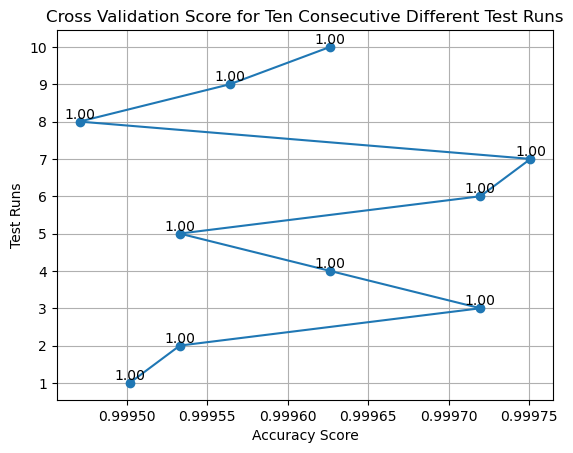

In [54]:
runs = [1,2,3,4,5,6,7,8,9,10]
accuracy_scores = TestRunScore

# Create a line graph
plot.plot(accuracy_scores, runs, marker='o')

# Add labels and title
plot.xlabel('Accuracy Score')
plot.ylabel('Test Runs')
plot.title('Cross Validation Score for Ten Consecutive Different Test Runs')

# Set y-axis ticks to match the runs
plot.yticks(runs)

# Display the graph
plot.grid(True)

# Display accuracy score on the graph
for run, score in zip(runs, accuracy_scores):
    plot.text(score, run, f'{score:.2f}', ha='center', va='bottom')

plot.show()

In [55]:
#feature importances
#create a list of feature names
feature_list = list(X.columns)
# Get feature importances from the trained model
feature_importances = pandas.Series(HIDS.feature_importances_, index=feature_list).sort_values(ascending=False)
#print or display the sorted feature importances
print("Feature Importances:".center(55))
print("")
print(feature_importances)

                  Feature Importances:                 

count                          2.172821e-01
srv_count                      2.054662e-01
dst_host_same_src_port_rate    1.084320e-01
flag                           7.706965e-02
service                        6.073594e-02
same_srv_rate                  5.728287e-02
src_bytes                      5.720109e-02
dst_bytes                      3.814271e-02
protocol_type                  3.446300e-02
dst_host_serror_rate           2.417970e-02
srv_serror_rate                2.367155e-02
serror_rate                    2.357014e-02
dst_host_srv_count             2.322082e-02
srv_rerror_rate                1.234353e-02
dst_host_count                 8.155248e-03
lnum_compromised               4.803976e-03
dst_host_srv_rerror_rate       4.493656e-03
wrong_fragment                 3.912421e-03
duration                       2.657139e-03
hot                            2.439158e-03
rerror_rate                    2.018870e-03
dst_host_diff_srv_r

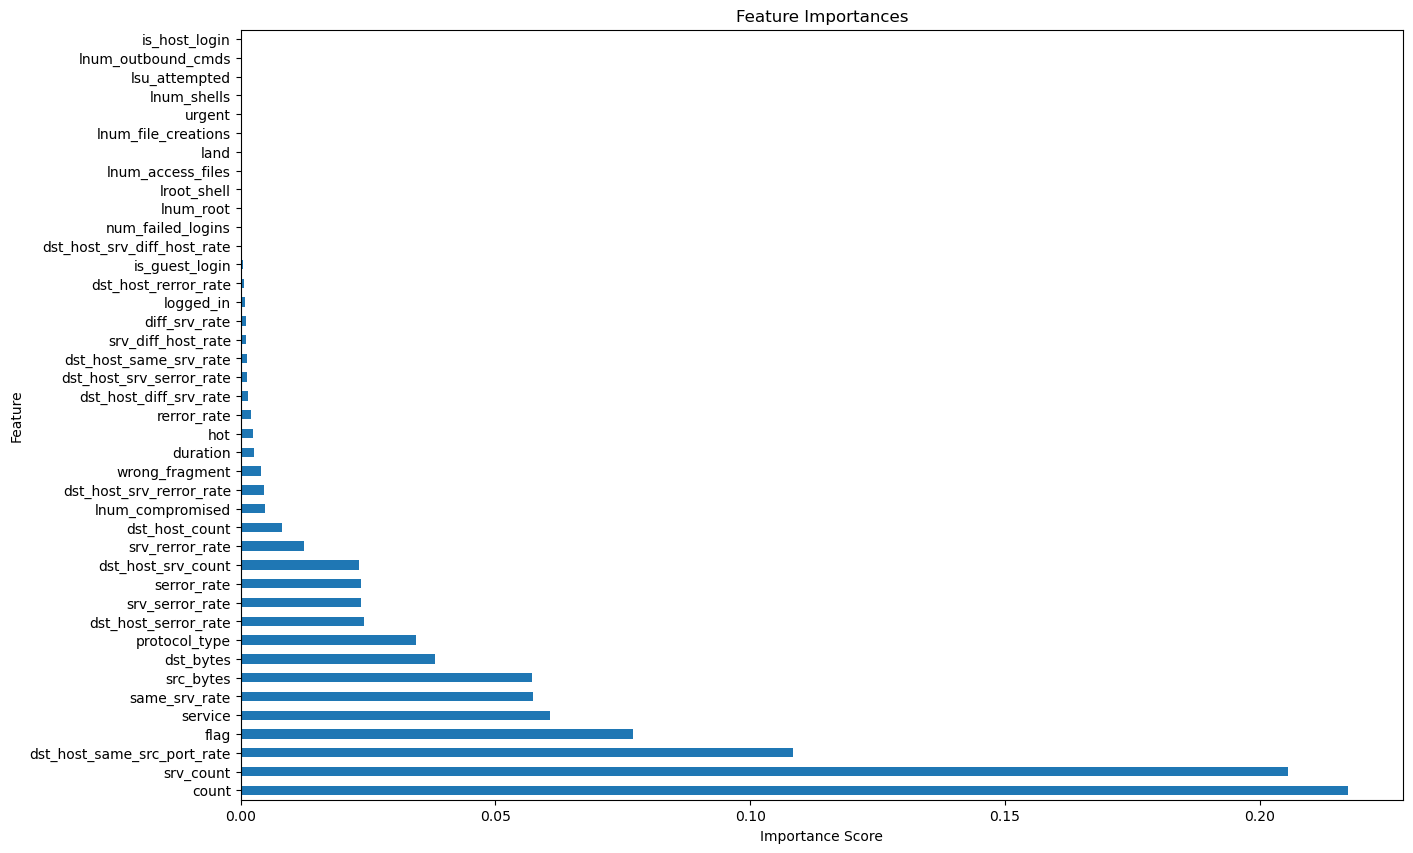

In [56]:
#showing feature importance in graph
#create a bar plot of feature importances
plot.figure(figsize=(15, 10))
feature_importances.plot(kind='barh')
plot.title('Feature Importances')
plot.xlabel('Importance Score')
plot.ylabel('Feature')
plot.show()

/usr/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


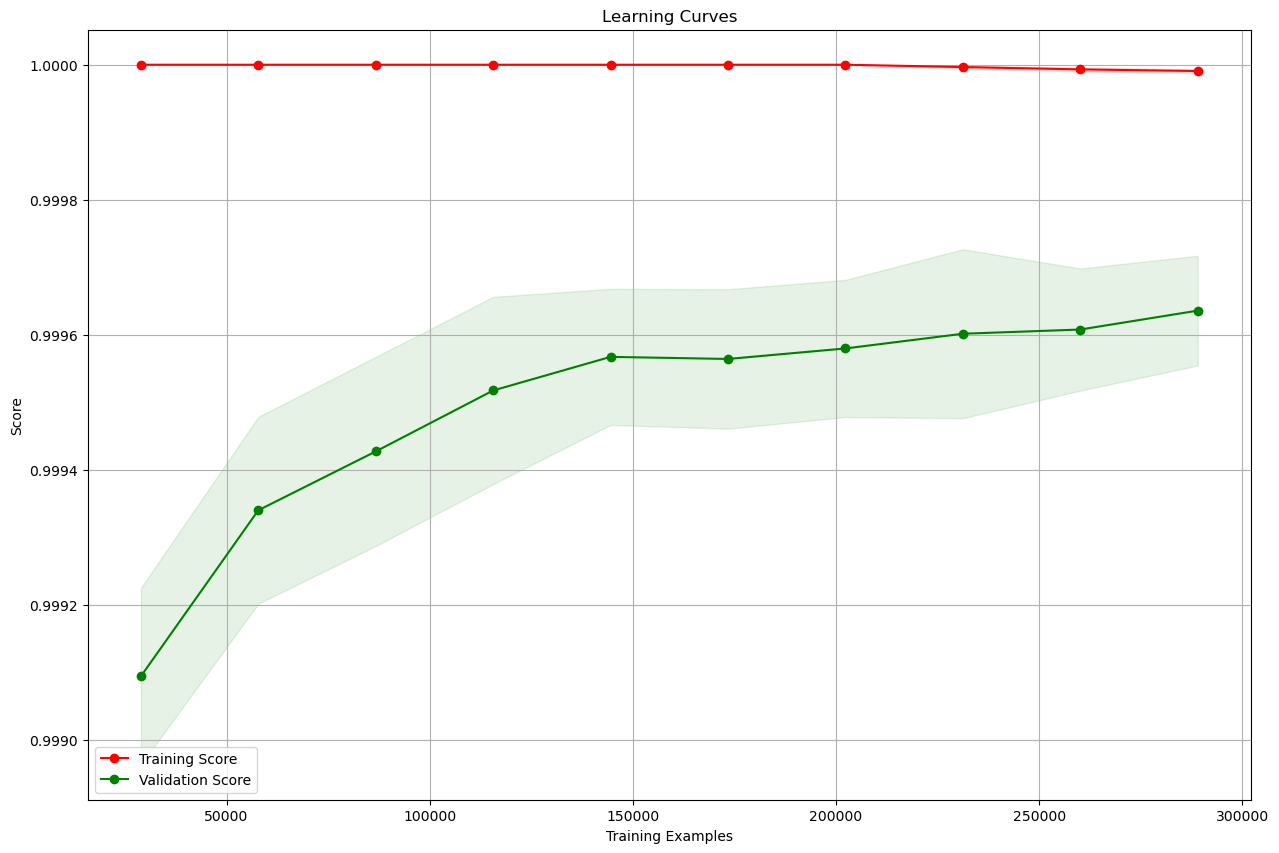

In [57]:
#learning curve
HIDS = RandomForestClassifier(n_estimators= 15, max_depth=30, min_samples_split=18, random_state=35) #creating a RFC instance
#generate learning curves
train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=10, 
                                                      train_sizes=numpy.linspace(0.1, 1.0, 10))
#calculate the mean and standard deviation of train and validation scores
train_scores_mean = numpy.mean(train_scores, axis=1)
train_scores_std = numpy.std(train_scores, axis=1)
val_scores_mean = numpy.mean(val_scores, axis=1)
val_scores_std = numpy.std(val_scores, axis=1)

#plot learning curves
plot.figure(figsize=(15, 10))
plot.title("Learning Curves")
plot.xlabel("Training Examples")
plot.ylabel("Score")
plot.grid()

plot.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plot.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")

plot.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plot.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation Score")

plot.legend()
plot.show()

In [1]:
#now to check for f1 score and precision recall 
